<a href="https://colab.research.google.com/github/IoanMilo/DAMA61/blob/main/%CE%91%CE%BD%CF%84%CE%AF%CE%B3%CF%81%CE%B1%CF%86%CE%BF_MILONAS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem 1
Work with the MNIST dataset and:
1) Split it into a training (5/7), a validation (1/7), and a test (1/7) set.
2) Use Keras to built a feed-forward neural network that contains three hidden dense layers of 50 nodes
each.
3) Compile the model using the Adam optimizer, a loss function of your choice and add accuracy in your
metrics.
4) What is the number of the trainable parameters of your model?
5) Fit the model on the training data (allow 100 epochs) and use early stopping with patience 5 epochs
to monitor the validation set.
6) Plot the history of the loss and accuracy of the training process for the training and the validation set.
7) What is the accuracy of your model on the test set?
Feel free to take any action needed to solve this problem.

**1)** Split it into a training (5/7), a validation (1/7), and a test (1/7) set.

In [ ]:
# Install tensorflow in order to use the API library.
# pip install tensorflow

# Import the API to use library functions
import tensorflow as tf
#assert version.parse(tf.__version__) >= version.parse("2.8.0")

# Load the MNIST dataset
mnist = tf.keras.datasets.mnist.load_data()

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = mnist
X_train_full.shape, X_test.shape
X_train, y_train = X_train_full[:-10000], y_train_full[:-10000]
print('Train set', X_train.shape, y_train.shape)
X_valid, y_valid = X_train_full[-10000:], y_train_full[-10000:]
print('Validation set:', X_valid.shape, y_valid.shape)
print('Test set:', X_test.shape, y_test.shape)

Train set (50000, 28, 28) (50000,)
Validation set: (10000, 28, 28) (10000,)
Test set: (10000, 28, 28) (10000,)


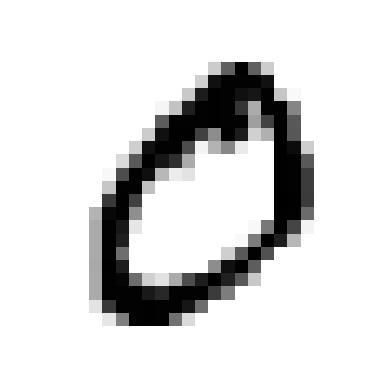

In [ ]:
# show an image
import matplotlib.pyplot as plt

plt.imshow(X_train[1], cmap="binary")
plt.axis('off')
plt.show()

Let's scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255:

In [ ]:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255.

**2)** Use Keras to built a feed-forward neural network that contains three hidden dense layers of 50 nodes
each.

### Creating the model using the Sequential API

In [ ]:
tf.random.set_seed(42)
model = tf.keras.Sequential()

In [ ]:
model.add(tf.keras.layers.InputLayer(input_shape=[28, 28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(50, activation="relu"))
model.add(tf.keras.layers.Dense(50, activation="relu"))
model.add(tf.keras.layers.Dense(50, activation="relu"))
model.add(tf.keras.layers.Dense(10, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 50)                39250     
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 dense_2 (Dense)             (None, 50)                2550      
                                                                 
 dense_3 (Dense)             (None, 10)                510       
                                                                 
Total params: 44860 (175.23 KB)
Trainable params: 44860 (175.23 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


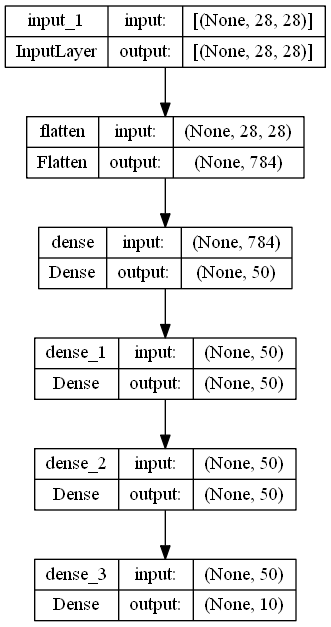

In [ ]:
#extra code – another way to display the model's architecture
tf.keras.utils.plot_model(model, "my_mnist_model.png", show_shapes=True)

In [ ]:
model.layers

In [ ]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [ ]:
weights, biases = hidden1.get_weights()
weights.shape

(784, 50)

In [ ]:
biases.shape
print(biases)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0.]


**3)** Compile the model using the Adam optimizer, a loss function of your choice and add accuracy in your
metrics.

##Compile the model##

In [ ]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Adam",
              metrics=["accuracy"])

**4)** What is the number of the trainable parameters of your model?

Trainable params: 44860 (175.23 KB)

**5)** Fit the model on the training data (allow 100 epochs) and use early stopping with patience 5 epochs to monitor the validation set.

In [ ]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_checkpoints", save_weights_only=True)

In [ ]:
#use early stopping with patience 5 epochs to monitor the validation set.
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=20, restore_best_weights=True)

In [ ]:
#Fit the model on the training data
history = model.fit(X_train, y_train, epochs=100, callbacks=[checkpoint_cb, early_stopping_cb], validation_data=(X_valid, y_valid))

Epoch 1/100
1563/1563 [==============================] - 3s 2ms/step - loss: 0.0058 - accuracy: 0.9987 - val_loss: 0.3926 - val_accuracy: 0.9731
Epoch 2/100
1563/1563 [==============================] - 4s 2ms/step - loss: 0.0058 - accuracy: 0.9988 - val_loss: 0.3746 - val_accuracy: 0.9746
Epoch 3/100
1563/1563 [==============================] - 4s 2ms/step - loss: 0.0040 - accuracy: 0.9992 - val_loss: 0.3909 - val_accuracy: 0.9763
Epoch 4/100
1563/1563 [==============================] - 4s 2ms/step - loss: 0.0060 - accuracy: 0.9986 - val_loss: 0.4189 - val_accuracy: 0.9735
Epoch 5/100
1563/1563 [==============================] - 4s 3ms/step - loss: 0.0050 - accuracy: 0.9989 - val_loss: 0.3891 - val_accuracy: 0.9759
Epoch 6/100
1563/1563 [==============================] - 4s 2ms/step - loss: 0.0048 - accuracy: 0.9989 - val_loss: 0.4276 - val_accuracy: 0.9754
Epoch 7/100
1563/1563 [==============================] - 4s 3ms/step - loss: 0.0066 - accuracy: 0.9987 - val_loss: 0.4279 - val_ac

In [ ]:
class PrintValTrainRatioCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        ratio = logs["val_loss"] / logs["loss"]
        print(f"Epoch={epoch}, val/train={ratio:.2f}")

In [ ]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[val_train_ratio_cb], verbose=0)

NameError: name 'X_train_wide' is not defined

In [ ]:
history.params

{'verbose': 1, 'epochs': 100, 'steps': 1563}

In [ ]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6]


In [ ]:
# dictionary (history.history) containing the loss and extra metrics # it measured at the end of each epoch on the training set and on #the validation set (if any).
history.history

{'loss': [0.008088793605566025,
  0.008942819200456142,
  0.008459769189357758,
  0.010425790213048458,
  0.005298718810081482],
 'accuracy': [0.9978799819946289,
  0.9973599910736084,
  0.9973800182342529,
  0.9972599744796753,
  0.9983199834823608],
 'val_loss': [0.2350911796092987,
  0.2698584198951721,
  0.26684877276420593,
  0.24911777675151825,
  0.27669721841812134],
 'val_accuracy': [0.972599983215332,
  0.9699000120162964,
  0.9714000225067139,
  0.9726999998092651,
  0.9710999727249146]}

**SOS 1**--Instead of passing a validation set using the validation_data
argument, you could set validation_split to the ratio of the
training set that you want Keras to use for validation. For example,
validation_split=0.1 tells Keras to use the last 10% of the data
(before shuffling) for validation.

**SOS 2**--If the training set was very skewed, with some classes being overrepresented and
others underrepresented, it would be useful to set the class_weight argument when
calling the fit() method, to give a larger weight to underrepresented classes and
a lower weight to overrepresented classes. These weights would be used by Keras
when computing the loss. If you need per-instance weights, set the sample_weight
argument. If both class_weight and sample_weight are provided, then Keras multiplies
them. Per-instance weights could be useful, for example, if some instances were
labeled by experts while others were labeled using a crowdsourcing platform: you
might want to give more weight to the former. You can also provide sample weights
(but not class weights) for the validation set by adding them as a third item in the
validation_data tuple.

**6)** Plot the history of the loss and accuracy of the training process for the training and the validation set.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

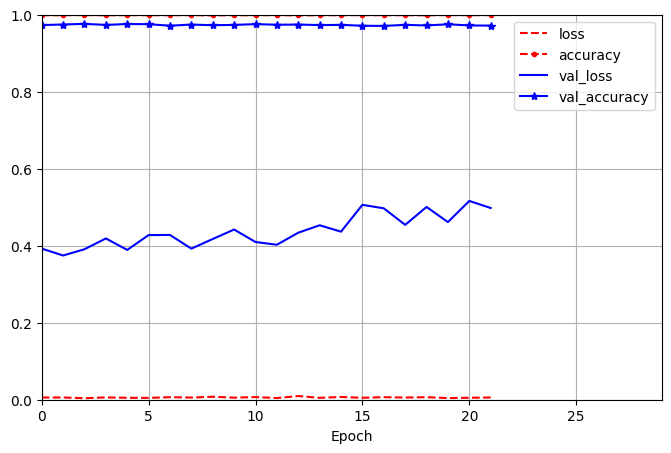

In [ ]:
pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.show()

**SOS**--You can see that both the training accuracy and the validation accuracy steadily
increase during training, while the training loss and the validation loss decrease. This
is good. The validation curves are relatively close to each other at first, but they get
further apart over time, which shows that there’s a little bit of overfitting. In this
particular case, the model looks like it performed better on the validation set than
on the training set at the beginning of training, but that’s not actually the case. The
validation error is computed at the end of each epoch, while the training error is
computed using a running mean during each epoch, so the training curve should be
shifted by half an epoch to the left. If you do that, you will see that the

**7)** What is the accuracy of your model on the test set? Feel free to take any action needed to solve this problem.

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3795 - accuracy: 0.9747


[0.3794850707054138, 0.9746999740600586]

As you saw in Chapter 2, it is common to get slightly lower performance on the test
set than on the validation set, because the hyperparameters are tuned on the validation
set, not the test set (however, in this example, we did not do any hyperparameter
tuning, so the lower accuracy is just bad luck). Remember to resist the temptation to
tweak the hyperparameters on the test set, or else your estimate of the generalization
error will be too optimistic

**EXTRA- PRDICTION**

In [ ]:
X_new = X_test[:4]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 30ms/step


array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
import numpy as np
class_names = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
then you can use the
#argmax() method to get the highest probability class index for each instance
y_pred = y_proba.argmax(axis=-1)
y_pred
np.array(class_names)[y_pred]
#This is similar to the output of the predict_proba() method in Scikit-Learn

array([7, 2, 1, 0])